In [1]:
import numpy as np
import pyaudio
import time
import librosa
import matplotlib.pyplot as plt
import librosa.display
from tensorflow.keras.models import load_model
import keyboard


In [2]:
def preprocessDataForNN(img_arr): 
    
    img_norm = img_arr/255
    img_size = img_norm.resize((150, 150, 3))
    img_compl = img_norm.reshape(-1, 150, 150, 3)
    
    return img_compl

In [3]:
def create_spectrogram(y, sample_rate):
    
    plt.interactive(False)
        
    fig = plt.figure(figsize=[0.72,0.72])
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    spectrogram = librosa.feature.melspectrogram(y=y, sr=sample_rate)
    librosa.display.specshow(librosa.power_to_db(spectrogram, ref=np.max))

    plt.close()    
    fig.clf()
    plt.close(fig)
    plt.close('all')

    del sample_rate,fig,ax
    
    return spectrogram
    

* recording
* recording


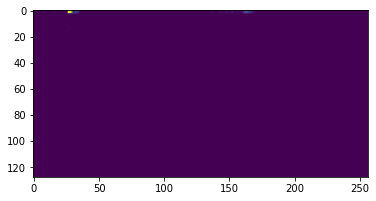

(128, 257)
[[0.00910392 0.9911586 ]]


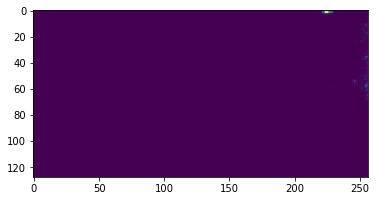

(128, 257)
[[0.01025549 0.9900057 ]]


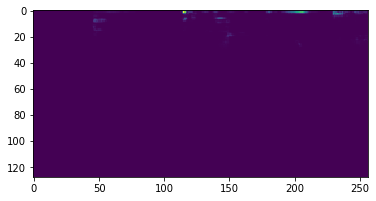

(128, 257)
[[0.00389227 0.9962809 ]]


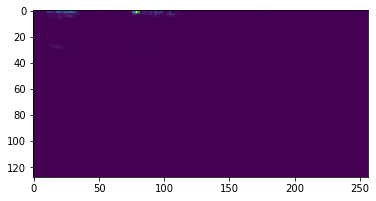

(128, 257)
[[0.00399852 0.99610996]]


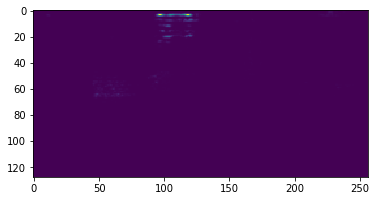

(128, 257)
[[0.00915667 0.99104416]]


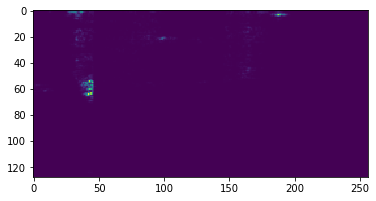

(128, 257)
[[0.01032224 0.989933  ]]


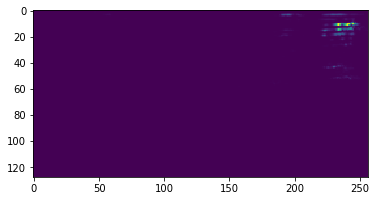

(128, 257)
[[0.0013819 0.9987048]]


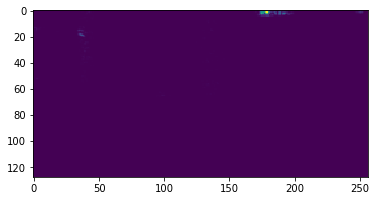

(128, 257)
[[0.01010117 0.9901581 ]]


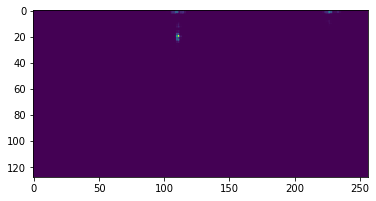

(128, 257)
[[0.00987107 0.99039537]]


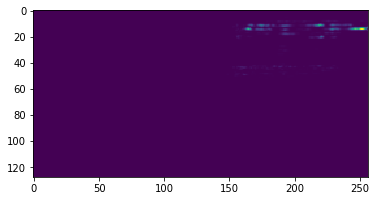

(128, 257)
[[0.00107306 0.99897075]]


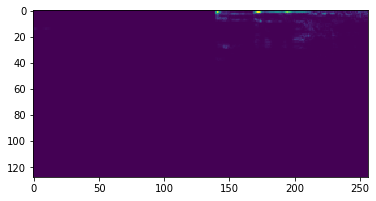

(128, 257)
[[5.2312016e-04 9.9946547e-01]]
Exit


In [7]:
import pyaudio
import wave

CHUNK = 1024
FORMAT = pyaudio.paFloat32
CHANNELS = 1
RATE = 44100
RECORD_SECONDS = 1

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

print("* recording")

CHUNK = 1024
FORMAT = pyaudio.paFloat32
CHANNELS = 2
RATE = 44100
RECORD_SECONDS = 1.5
#WAVE_OUTPUT_FILENAME = "output.wav"

p = pyaudio.PyAudio()
stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

print("* recording")

frames = []

model = load_model(r'D:\save_1.h5')

while(True):  
    frames = []  
    for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
        data = stream.read(CHUNK)
        frames.extend(data)
    
    #print("* done recording")

    frames = bytes(frames)

    numpy_array = np.frombuffer(frames, dtype=np.float32)
    sp = create_spectrogram(numpy_array, RATE)
     
    plt.imshow(sp, interpolation='nearest') 
    plt.show() 
    librosa.display.specshow(librosa.power_to_db(sp, ref=np.max))
    
    print(sp.shape)
    
    img_compl = preprocessDataForNN(sp)
    final_res = model.predict(img_compl)
    print(final_res)
    
    try:  # used try so that if user pressed other than the given key error will not be shown
        if keyboard.is_pressed('q'):  # if key 'q' is pressed 
            print('Exit')
            break  # finishing the loop
    except:
        break  # if user pressed a key other than the given key the loop will break
    #print(sp)

# numpy_array = np.frombuffer(pull, dtype=np.float32)
# sp = create_spectrogram(numpy_array, RATE)
# print(sp)

#stream.stop_stream()
##stream.close()
p.terminate()

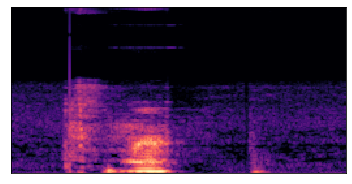

In [5]:
from matplotlib import pyplot as plt 
plt.imshow(sp, interpolation='nearest') 
plt.show() 
librosa.display.specshow(librosa.power_to_db(sp, ref=np.max))

In [9]:
#1
#img - numpy array spectrogram

from sys import argv
import cv2 as cv
import numpy as np

img = sp

ret, threshold = cv.threshold(img, 120, 255, cv.THRESH_BINARY)

cv.imshow('threshold', threshold)
cv.imshow('orig', img)

#2

normalizedImg = np.zeros((150, 150))
normalizedImg = cv.normalize(img,  normalizedImg, 0, 255, cv.NORM_MINMAX)
cv.imshow('dst_rt', normalizedImg)

cv.waitKey(0)
cv.destroyAllWindows()

In [14]:
import imageio
import numpy
img = imageio.imread(r'D:\reposetory\Save_Transport\dataset\train\one_sec_cut.jpg\0_1_01.jpg')
array = numpy.asarray(img)
print(array.shape)

(217, 223, 3)
